In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt

In [2]:
A_train = pd.read_csv("classificationA.train", sep  = "\t", names=["X1","X2","Y"])
B_train = pd.read_csv("classificationB.train", sep  = "\t", names=["X1","X2","Y"])
C_train = pd.read_csv("classificationC.train", sep  = "\t", names=["X1","X2","Y"])

A_test = pd.read_csv("classificationA.test", sep  = "\t", names=["X1","X2","Y"])
B_test = pd.read_csv("classificationB.test", sep  = "\t", names=["X1","X2","Y"])
C_test = pd.read_csv("classificationC.test", sep  = "\t", names=["X1","X2","Y"])

Visualisation des données

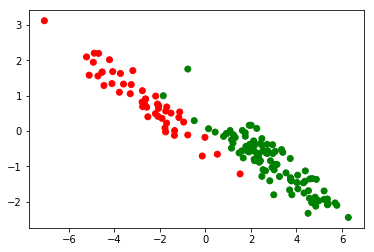

In [3]:
color = ['red' if l else 'green' for l in A_train.Y]
plt.scatter(A_train.X1, A_train.X2, color=color)
plt.show()

# Calcul des EMV

In [4]:
N = A_train.Y.sum()
n = A_train.Y.size

Estimateur de $\pi$

In [5]:
Pi = N/n

Estimateur de $\mu_0$ et $\mu_1$

In [6]:
mu0 = A_train[['X1','X2']].mul(1-A_train.Y, axis=0).sum()/(n-N)

In [7]:
mu1 = A_train[['X1','X2']].mul(A_train.Y, axis=0).sum()/N

Visualisation de $\mu_0$ et $\mu_1$

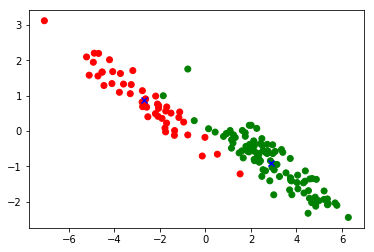

In [8]:
plt.scatter(A_train.X1, A_train.X2, color=color)
plt.scatter(mu0.X1, mu0.X2, color="blue", marker="x")
plt.scatter(mu1.X1, mu1.X2, color="blue", marker="x")
plt.show()

Estimateur de $\Sigma$

In [9]:
Centered_A_train = (A_train[['X1','X2']]-mu1).mul(A_train.Y, axis=0) + (A_train[['X1','X2']]-mu0).mul(1-A_train.Y, axis=0)

In [10]:
Sigma_A = Centered_A_train.T.dot(Centered_A_train)/n

Visualisation de $\Sigma$

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(Sigma_A)
EV = pd.DataFrame(eigenvectors,index=['X1','X2'])

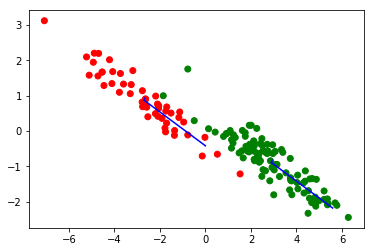

In [12]:
plt.scatter(A_train.X1, A_train.X2, color=color)
SAxis_x1, SAxis_y1 = [mu1.X1, (mu1+Sigma_A.dot(EV[0])).X1], [mu1.X2, (mu1+Sigma_A.dot(EV[0])).X2]
SAxis_x2, SAxis_y2 = [mu1.X1, (mu1+Sigma_A.dot(EV[1])).X1], [mu1.X2, (mu1+Sigma_A.dot(EV[1])).X2]
SAxis_x3, SAxis_y3 = [mu0.X1, (mu0+Sigma_A.dot(EV[0])).X1], [mu0.X2, (mu0+Sigma_A.dot(EV[0])).X2]
SAxis_x4, SAxis_y4 = [mu0.X1, (mu0+Sigma_A.dot(EV[1])).X1], [mu0.X2, (mu0+Sigma_A.dot(EV[1])).X2]
plt.plot(SAxis_x1, SAxis_y1, SAxis_x2, SAxis_y2, SAxis_x3, SAxis_y3, SAxis_x4, SAxis_y4, color="blue")
plt.show()